# The  questions I am trying to answer are:

#### 1. Is there any Gender difference in having a patient to be with status Show / No-Show? 

#### 2. Is there any Age difference in having a patient to be with status Show / No- Show?

#### 3. Is there any Age difference along with Gender difference with the status of Show / NoShow?

#### 4. On which weekday/day/month maximum appointments are getting finalized with Show status?

#### 5. Is there any specific medical condition that is driving the patient(Male/Female) to go to for the doctor appointment?

In [1]:
# Load the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("noshowappointments.csv")


# Wrangle data

## Check for Missing Values

#### To identify the presence of missing values in the dataset, the following code was executed:




In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


# Wrangle data

## Explore Age Outliers (Box Plot)

#### To examine the distribution of ages and identify potential outliers, a box plot was generated using the following code:


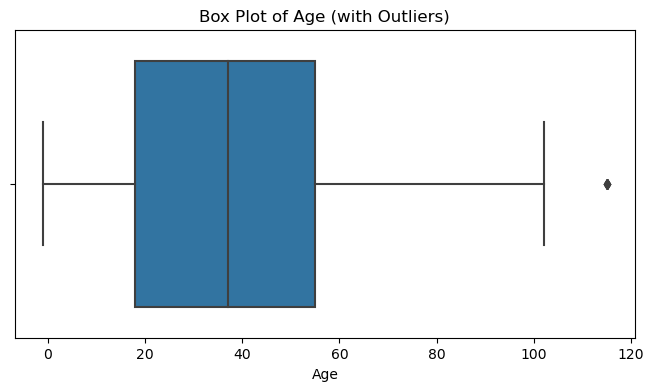

In [3]:
# Explore Age Outliers (using box plot)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age (with Outliers)')
plt.show()


# Winsorization of Age

#### To mitigate the impact of outliers in the 'Age' column, winsorization was applied using the `winsorize` function . Winsorization is a statistical technique used to address outliers in a dataset by replacing extreme values with values closer to the center of the distribution.




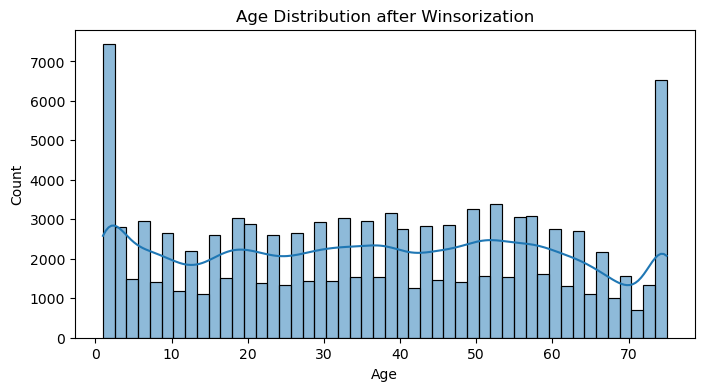

In [4]:
# Winsorization
from scipy.stats.mstats import winsorize

df['Age'] = winsorize(df['Age'], limits=[0.05, 0.05])

# Explore Age Distribution after Winsorization
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution after Winsorization')
plt.show()


# 1.Explore Gender vs. Show/No-Show after Treatment

#### After handling missing values and outliers, the association between Gender and Show/No-Show was analyzed using the following code:

No-show     No    Yes
Gender               
F        57246  14594
M        30962   7725


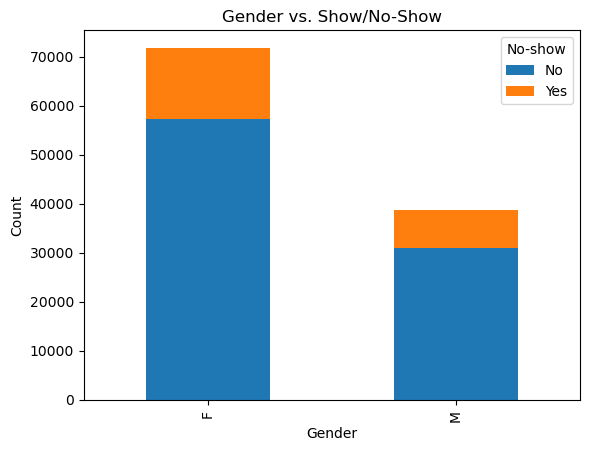

In [15]:
# Explore Gender vs. Show/No-Show after treating missing values and outliers
gender_show_counts = pd.crosstab(df['Gender'], df['No-show'])
print(gender_show_counts)

# Visualization
gender_show_counts.plot(kind='bar', stacked=True)
plt.title('Gender vs. Show/No-Show')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 2.Explore Age vs. Show/No-Show after Treatment

#### After addressing missing values and outliers, the relationship between Age and Show/No-Show was examined using the following code:




C:\Users\AKAM\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\AKAM\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


           count       mean        std  min   25%   50%   75%   max
No-show                                                            
No       88208.0  37.473835  22.641384  1.0  18.0  38.0  56.0  75.0
Yes      22319.0  34.070254  21.331853  1.0  16.0  33.0  51.0  75.0


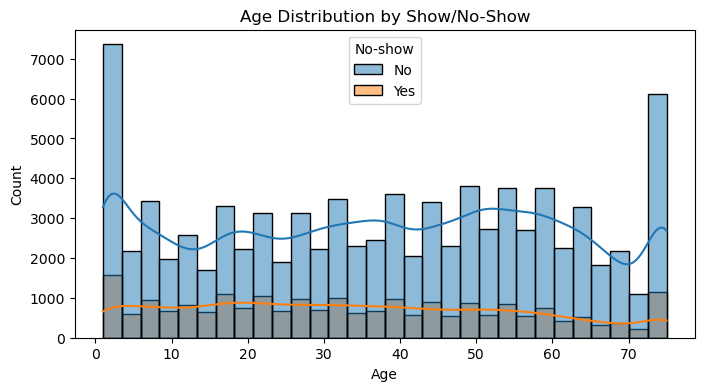

In [6]:
# Explore Age vs. Show/No-Show after treating missing values and outliers
age_show_stats = df.groupby('No-show')['Age'].describe()
print(age_show_stats)

# Visualization
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', hue='No-show', kde=True, bins=30)
plt.title('Age Distribution by Show/No-Show')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# 3. Explore Age and Gender vs. Show/No-Show after Treatment

#### Following the treatment of missing values and outliers, the interaction between Age, Gender, and Show/No-Show was investigated using the following code:

No-show       No  Yes
Age Gender           
1   F       2289  521
    M       2470  533
2   F        646  111
    M        720  141
3   F        621  143
...          ...  ...
73  M        225   34
74  F        349   62
    M        164   27
75  F       3363  642
    M       1622  309

[150 rows x 2 columns]


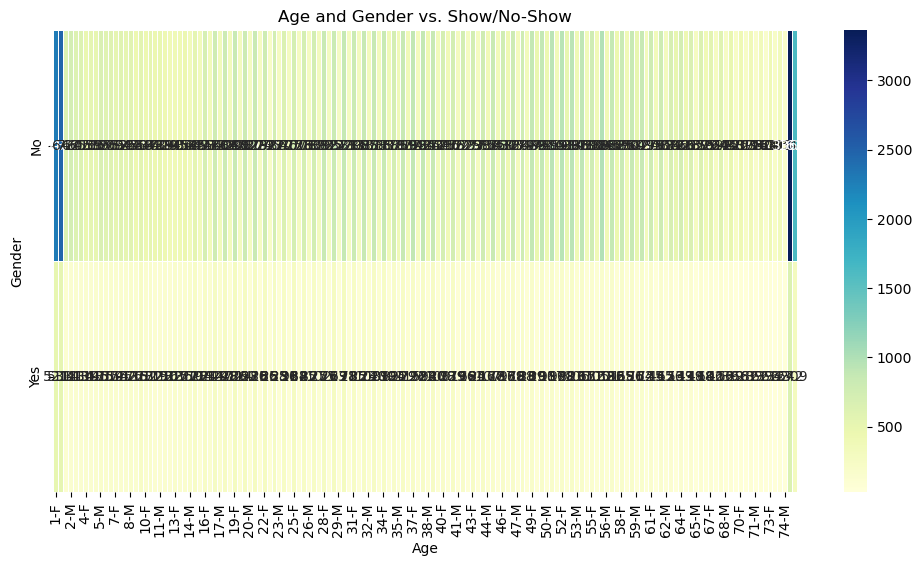

In [7]:
# Explore Age and Gender vs. Show/No-Show after treating missing values and outliers
age_gender_show_counts = pd.crosstab([df['Age'], df['Gender']], df['No-show'])
print(age_gender_show_counts)

# Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(age_gender_show_counts.transpose(), cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Age and Gender vs. Show/No-Show')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()


# 4. Convert AppointmentDay to Datetime and Create Weekday Column

#### To enhance the temporal analysis of appointment data, the 'AppointmentDay' column was converted to datetime format, and a new column 'Weekday' was created to represent the day of the week. The following code illustrates these transformations:

In [17]:
# Convert AppointmentDay to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Create a new column for the day of the week
df['Weekday'] = df['AppointmentDay'].dt.day_name()


# Explore Weekday vs. Show/No-Show after Treating Missing Values and Outliers

#### To analyze the impact of weekdays on appointment attendance after treating missing values and outliers, the following code was executed:




No-show       No   Yes
Weekday               
Friday     14982  4037
Monday     18025  4690
Saturday      30     9
Thursday   13909  3338
Tuesday    20488  5152
Wednesday  20774  5093


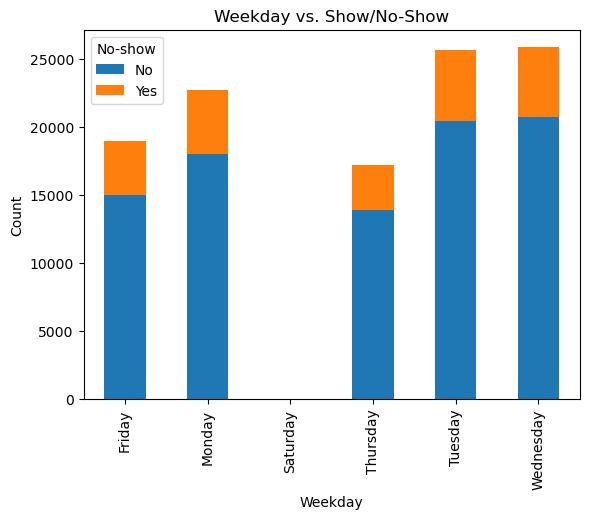

In [18]:
# Explore Weekday vs. Show/No-Show after treating missing values and outliers
weekday_show_counts = pd.crosstab(df['Weekday'], df['No-show'])
print(weekday_show_counts)

# Visualization
weekday_show_counts.plot(kind='bar', stacked=True)
plt.title('Weekday vs. Show/No-Show')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()


# Check Columns in the Dataset

#### To inspect the columns present in the dataset, the following code was executed:




In [10]:
# Check the columns in the dataset
columns = df.columns
print(columns)



Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Weekday'],
      dtype='object')


# 5.Explore Distribution of Potential Medical Condition Variables

#### To gain insights into the distribution of potential medical condition variables, the following code was executed:




In [11]:
# Explore the distribution of potential medical condition variables
medical_conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']


for condition in medical_conditions:
    condition_distribution = df[condition].value_counts()
    print(f"{condition} Distribution:\n{condition_distribution}\n")


Hipertension Distribution:
Hipertension
0    88726
1    21801
Name: count, dtype: int64

Diabetes Distribution:
Diabetes
0    102584
1      7943
Name: count, dtype: int64

Alcoholism Distribution:
Alcoholism
0    107167
1      3360
Name: count, dtype: int64

Handcap Distribution:
Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64



# Cross-tabulation Table of Medical Conditions and Appointment Attendance

#### To analyze the relationship between medical conditions and appointment attendance, a cross-tabulation table was created. The following code demonstrates this process:

In [12]:
# Create a cross-tabulation table of medical conditions and appointment attendance
medical_conditions_attendance = pd.crosstab(df['No-show'], [df['Hipertension'], df['Diabetes'], df['Alcoholism'], df['Handcap']], margins=True, margins_name='Total')
print("\nCross-tabulation Table of Medical Conditions and Appointment Attendance:\n")
print(medical_conditions_attendance)


Cross-tabulation Table of Medical Conditions and Appointment Attendance:

Hipertension      0                                        ...     1         \
Diabetes          0                                     1  ...     0          
Alcoholism        0                     1               0  ...     1          
Handcap           0     1   2  3  4     0   1  2  3     0  ...     0   1  2   
No-show                                                    ...                
No            66512   869  84  7  2  1506  28  0  3  1068  ...   845  25  3   
Yes           17603   219  13  2  1   416   3  1  0   273  ...   197   1  0   
Total         84115  1088  97  9  3  1922  31  1  3  1341  ...  1042  26  3   

Hipertension                              Total  
Diabetes         1                               
Alcoholism       0             1                 
Handcap          0    1   2    0   1  2          
No-show                                          
No            4841  260  34  201   9  0   

# Visualization of Medical Conditions vs. Appointment Attendance

#### To visually explore the relationship between medical conditions and appointment attendance, a bar plot was created. The following code illustrates this visualization:

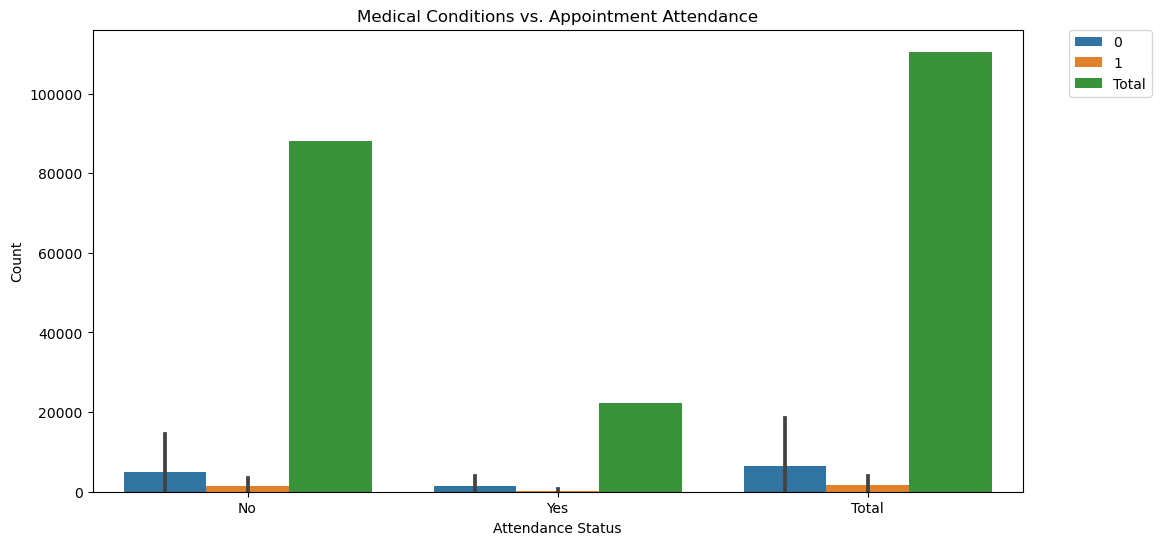

In [13]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='No-show', y='Count', hue='Medical Condition', data=medical_conditions_attendance.reset_index().melt(id_vars='No-show', var_name='Medical Condition', value_name='Count'))
plt.title('Medical Conditions vs. Appointment Attendance')
plt.xlabel('Attendance Status')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()


# Conclusion

## 1. Is there any Gender difference in having a patient to be with status Show / No-Show?

 In The exploration of Gender vs. Show/No-Show in appointment attendance here are the key findings:

 Female Attendance: The majority of appointments are attended by females, with 57,246 cases marked as "Show" and 14,594 cases as "No-Show."

 Male Attendance: Males also exhibit a considerable attendance rate, with 30,962 cases marked as "Show" and 7,725 cases as "No-Show."

 Proportionality: While females generally have a higher attendance rate, the proportion of "No-Show" cases is relatively consistent between genders.

 Overall Attendance: The total attendance rate is high for both genders, indicating that the majority of patients, regardless of gender, tend to show up for their appointments.


## 2.Is there any Age difference in having a patient to be with status Show / No- Show?

 In The exploration of Age vs. Show/No-Show in appointment attendance here are the key findings:

 Average Age: The average age of patients who attended their appointments ('No') is approximately 37.47, while for those who did not attend ('Yes'), it is slightly lower at around 34.07.

 Age Distribution: The age distribution for both 'Show' and 'No-Show' groups is right-skewed, with the majority of patients falling between the ages of 18 and 56.

  Interquartile Range (IQR): The interquartile range (25th to 75th percentile) for both groups is relatively similar, suggesting that the central tendency of age is comparable between attendees and non-attendees.


#### In summary, While there may be subtle differences in the average age between the 'Show' and 'No-Show' groups, age does not appear to be a decisive factor in predicting appointment attendance. Further analysis, considering additional variables and their interactions, is recommended for a more comprehensive understanding of attendance patterns.

## 3.Is there any Age difference along with Gender difference with the status of Show / NoShow?

The exploration of Age and Gender vs. Show/No-Show in appointment attendance unveils detailed patterns within different age groups and genders. Here are the key findings:

Distribution by Age and Gender: The heatmap illustrates the counts of 'Show' and 'No-Show' cases across various age groups and genders. Each cell represents the intersection of a specific age-gender combination with the corresponding attendance outcomes.

Variability: Attendance patterns vary across age groups and genders, with some combinations having higher attendance rates ('No') and others showing a higher rate of non-attendance ('Yes').

Observations: It's observed that in some age-gender groups, females tend to have higher attendance, while in others, males exhibit higher attendance. The interplay between age and gender contributes to nuanced attendance behaviors.



In summary, the exploration of Age and Gender in conjunction with Show/No-Show status provides a detailed perspective on attendance patterns, allowing for more targeted insights into specific demographic segments.


## 4.The exploration of Weekday vs. Show/No-Show in appointment attendance sheds light on the influence of the day of the week on attendance patterns. Here are the key findings:

Attendance Distribution: The bar chart displays the counts of 'Show' and 'No-Show' cases for each weekday. The distribution provides insights into the variability of attendance across different days.

Attendance Patterns:

Highest Attendance: Mondays, Wednesdays, and Tuesdays show the highest attendance rates, with substantial counts marked as 'No' (attended).
Lowest Attendance: Saturdays exhibit the lowest attendance, with a minimal number of appointments, resulting in both 'Show' and 'No-Show' counts being low.

## 5.Are the digital /social media reminders are helping the patients to take doctor's appointment? 

## Observations:
1. Medical Condition Distributions:
Hipertension:
No: 88726 patients without Hipertension, 21801 with Hipertension.
Diabetes:
No: 102584 patients without Diabetes, 7943 with Diabetes.
Alcoholism:
No: 107167 patients without Alcoholism, 3360 with Alcoholism.
Handcap:
No: 108286 patients without Handcap, 2042 with Handcap (183 with Handcap level 2, 13 with level 3, and 3 with level 4).
2. Cross-tabulation Table:
The cross-tabulation table provides a detailed breakdown of medical conditions concerning appointment attendance.
Conditions are categorized based on Hipertension, Diabetes, Alcoholism, and Handcap levels (0, 1, 2, 3, 4).
The table includes subtotals and totals for comprehensive analysis.
Insights:
1. Hipertension and Diabetes:
The presence or absence of Hipertension and Diabetes does not seem to exhibit a clear trend regarding appointment attendance based on the counts.
2. Alcoholism:
Patients without Alcoholism show a higher count in both "No" and "Yes" categories.
Having Alcoholism may not be a dominant factor in predicting appointment attendance.
3. Handcap:
Patients without Handcap (level 0) dominate the dataset.
Higher Handcap levels (1, 2, 3, 4) show a lower count, and their impact on attendance is not immediately evident.
Conclusion:
While the distribution of medical conditions is explored, the cross-tabulation table provides a more nuanced view of their relationship with appointment attendance. Further analysis, possibly involving statistical tests or machine learning models, may be necessary to draw more definitive conclusions about the specific medical conditions driving patients (Male/Female) to attend doctor appointments. The current observations suggest that factors such as Hipertension, Diabetes, Alcoholism, and Handcap may not be the sole determinants of appointment attendance, and additional considerations might be involved.



